In [1]:
# Import modules
import sys
import os
import pandas as pd
from pycaret.classification import *

In [2]:
## Check modules version
print('Notebook running from:',sys.executable)
print('Pandas:',pd.__version__)

Notebook running from: /home/naneen/Documents/DataScience/Projects/FinHack_LT_AV/py3-finhack/bin/python3
Pandas: 1.2.1


In [3]:
## List data-raw
path_pwd = os.getcwd()
path_data_train = path_pwd+'/'+'data_raw/Train/' 
os.listdir(path_data_train)

['train_bureau.xlsx', 'data_dict.xlsx', '.DS_Store', 'train_Data.xlsx']

In [4]:
## Set trainig data files
file_customer_train = path_data_train+'train_Data.xlsx'
print('Customer file:', file_customer_train)

Customer file: /home/naneen/Documents/DataScience/Projects/FinHack_LT_AV/data_raw/Train/train_Data.xlsx


In [5]:
## Load customer trainig data
df_customer = pd.read_excel(file_customer_train)
df_customer.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [117]:
# Shape as data loaded
df_customer = df_customer.dropna()
df_customer.shape

(107126, 26)

In [132]:
# Organize data
data = df_customer.sample(frac=0.90, random_state=786)
data_unseen = df_customer.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (96413, 26)
Unseen Data For Predictions: (10713, 26)


***

## Setup

In [133]:
# Sub-set of data to test
nsubset = 96413
data = data.iloc[:nsubset,:]
data.shape

(96413, 26)

In [134]:
# list of attributes to consider
list_attributes = ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate', 'LTV', 'SEX', 'AGE', 'MonthlyIncome','Top-up Month']

# Divide data into data_features and data_target
#data = data[list_attributes]

In [135]:
data.shape

(96413, 26)

In [136]:
## Setup
mclf = setup(data = data, target = 'Top-up Month', session_id=123, experiment_name='FinHack1')

,Description,Value
0,session_id,123
1,Target,Top-up Month
2,Target Type,Multiclass
3,Label Encoded,"> 48 Months: 0, 12-18 Months: 1, 18-24 Months: 2, 24-30 Months: 3, 30-36 Months: 4, 36-48 Months: 5, No Top-up Service: 6"
4,Original Data,"(96413, 26)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [137]:
# Available models for multilevel classification
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [138]:
# Identify the best model - Run overnight
#best_model = compare_models()

***

## Build Model

In [139]:
# Create model
model = create_model('ada', fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8102,0.5371,0.1570,0.7261,0.7417,0.0325,0.0552
1,0.8092,0.5511,0.1593,0.7267,0.7420,0.0359,0.0584
2,0.7800,0.5403,0.1908,0.7134,0.7248,0.0130,0.0159
3,0.8206,0.5466,0.1501,0.7300,0.7445,0.0232,0.0717
Mean,0.8050,0.5438,0.1643,0.7241,0.7382,0.0262,0.0503
SD,0.0151,0.0054,0.0157,0.0063,0.0079,0.0089,0.0208


In [140]:
# hyper-param tuning
tuned_model = tune_model(model, fold=4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8207,0.5487,0.1429,0.6735,0.7398,0.0000,0.0000
1,0.8210,0.5543,0.1449,0.7216,0.7418,0.0094,0.0495
2,0.8209,0.5444,0.1458,0.7512,0.7422,0.0109,0.0522
3,0.8218,0.5505,0.1471,0.7494,0.7435,0.0159,0.0751
Mean,0.8211,0.5495,0.1452,0.7239,0.7418,0.0091,0.0442
SD,0.0004,0.0035,0.0015,0.0314,0.0013,0.0058,0.0274


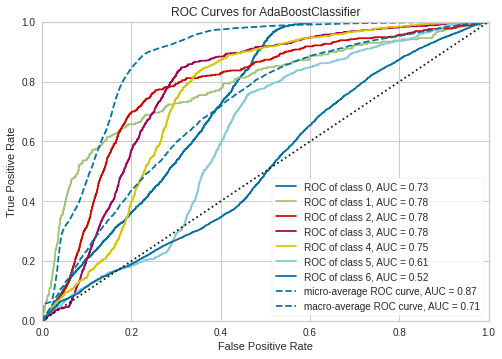

In [141]:
plot_model(tuned_model, plot='auc')

In [142]:
# Finalize the model 
final_model = finalize_model(tuned_model)
print(final_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.435, n_estimators=110, random_state=123)


***

## Save Model

In [143]:
# model_name (INPUT)
model_name = 'ada'

# model_save_name
model_save_name  = model_name+'_'+str(nsubset)

# SAve model 
save_model(final_model, 'models_saved/'+model_save_name)

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Top-up Month',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                 ('dummy', Dummify(target='Top-up Month')),
                 ('fix_perfect', Remove_100(target='Top-up Month')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough')

***

## Re-load Model

In [144]:
# Load saved model 
saved_model = load_model('models_saved/'+model_save_name)

Transformation Pipeline and Model Successfully Loaded


In [145]:
unseen_predictions = predict_model(saved_model, data=data_unseen)
unseen_predictions.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month,Label,Score
0,11,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,600000,360000.0,...,60.00,M,41.0,46195.08,RAIPUR,CHATTISGARH,493114.0,No Top-up Service,No Top-up Service,0.1658
1,12,Monthly,Arrear,Closed,PDC,5,RAIPUR,46,539275,400000.0,...,74.17,M,51.0,15000.00,RAIPUR,CHATTISGARH,493196.0,No Top-up Service,No Top-up Service,0.1673
2,19,Quatrly,Arrear,Closed,PDC_E,152,BILASPUR,36,507265,360000.0,...,70.97,M,58.0,17000.00,BILASPUR,CHATTISGARH,495001.0,No Top-up Service,No Top-up Service,0.1670
3,22,Monthly,Arrear,Closed,Billed,152,BILASPUR,33,354000,290000.0,...,81.92,M,27.0,290000.00,BILASPUR,CHATTISGARH,495224.0,No Top-up Service,No Top-up Service,0.1657
4,109,Quatrly,Arrear,Closed,PDC_E,194,CUTTACK,48,600000,436000.0,...,72.67,M,46.0,25000.00,GAYA,BIHAR,823001.0,No Top-up Service,No Top-up Service,0.1695


In [146]:
unseen_predictions['Label'].value_counts()

No Top-up Service    10691
 > 48 Months            20
36-48 Months             2
Name: Label, dtype: int64

In [147]:
from pycaret.utils import check_metric
check_metric(data_unseen['Top-up Month'], unseen_predictions['Label'], metric = 'Accuracy')

0.8208

***

In [153]:
### Training data from Hackthon
file_customer_test = 'data_raw/test_Data.xlsx'

In [155]:
df_customer_test = pd.read_excel(file_customer_test)
df_customer_test.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,...,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,...,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,...,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,...,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,...,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0


In [159]:
list_attributes2 = ['ID','Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate', 'LTV', 'SEX', 'AGE', 'MonthlyIncome']

In [160]:
#data_unseen2 = df_customer_test[list_attributes2]
data_unseen2 = df_customer_test.copy()
data_unseen2.shape

(14745, 25)

In [161]:
unseen_predictions2 = predict_model(final_model, data=data_unseen2)
unseen_predictions2.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Label,Score
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,...,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0,No Top-up Service,0.1669
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,...,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0,No Top-up Service,0.1683
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,...,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0,No Top-up Service,0.1677
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,...,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0,No Top-up Service,0.1656
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,...,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0,No Top-up Service,0.1664


In [162]:
unseen_predictions2['Label'].value_counts()

No Top-up Service    14734
 > 48 Months            11
Name: Label, dtype: int64

In [163]:
save_submission = unseen_predictions2[['ID','Label']]
save_submission.rename(columns={'Label':'Top-up Month'}, inplace=True)
save_submission.head()

,ID,Top-up Month
0,4,No Top-up Service
1,5,No Top-up Service
2,6,No Top-up Service
3,25,No Top-up Service
4,119,No Top-up Service


In [164]:
save_submission.to_csv(model_save_name+'.csv', index=False)